In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import h5py

In [2]:
labels = os.listdir("C:\\Users\\parun\\Downloads\\Dissertation\\dataset\\droswsiness")

In [3]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

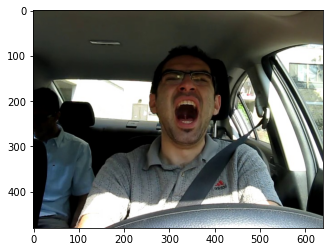

In [4]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("C:\\Users\\parun\\Downloads\\Dissertation\\dataset\\droswsiness\\yawn\\88.jpg"))

In [5]:
y = plt.imread("C:\\Users\\parun\\Downloads\\Dissertation\\dataset\\droswsiness\\yawn\\88.jpg")

In [6]:
y.shape

(480, 640, 3)

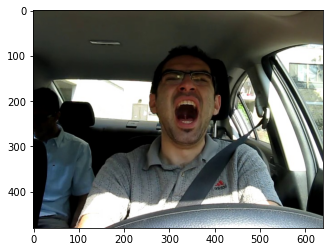

In [7]:
plt.imshow(plt.imread("C:\\Users\\parun\\Downloads\\Dissertation\\dataset\\droswsiness\\yawn\\88.jpg"))

In [8]:
def face_for_yawn(direc="C:\\Users\\parun\\Downloads\\Dissertation\\dataset\\droswsiness", face_cas_path="C:\\Users\\parun\\Downloads\\Dissertation\\xml docs\\haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


In [9]:
def get_data(dir_path="C:\\Users\\parun\\Downloads\\Dissertation\\dataset\\droswsiness", face_cas="C:\\Users\\parun\\Downloads\\Dissertation\\xml docs\\haarcascade_frontalface_default.xml", eye_cas="C:\\Users\\parun\\Downloads\\Dissertation\\xml docs\\haarcascade_eye.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [10]:
data_train = get_data()

2
3


In [11]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [12]:
new_data = append_data()

0
1
2
3


C:\Users\parun\AppData\Local\Temp/ipykernel_4732/2804427426.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


In [13]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [14]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [15]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [16]:
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [18]:
len(X_test)

578

In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [20]:
tf.__version__

'2.7.0'

In [21]:
import keras
keras.__version__

'2.7.0'

In [22]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [59]:
model = tf.keras.models.Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 71, 71, 256)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)      

In [24]:
import time

start = time.time()
batchSize = 800
trainingEpochs = 50

# model.compile(optimizer='adam', loss='categorical_crossentropy',
#               metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history = model.fit(train_generator, batch_size=batchSize,
                    epochs=trainingEpochs, validation_data=test_generator, 
                    validation_steps=len(test_generator),
                    callbacks=[early_stopping], 
                    shuffle=True)

end = time.time()
print("*Net Time : ", (end-start)/60, ' mins...')

Epoch 1/50
43/43 [==============================] - 108s 2s/step - loss: 1.0336 - accuracy: 0.5457 - val_loss: 0.6307 - val_accuracy: 0.7249
Epoch 2/50
43/43 [==============================] - 96s 2s/step - loss: 0.5151 - accuracy: 0.7914 - val_loss: 0.4410 - val_accuracy: 0.8322
Epoch 3/50
43/43 [==============================] - 96s 2s/step - loss: 0.3769 - accuracy: 0.8441 - val_loss: 0.4226 - val_accuracy: 0.8114
Epoch 4/50
43/43 [==============================] - 97s 2s/step - loss: 0.3503 - accuracy: 0.8537 - val_loss: 0.3122 - val_accuracy: 0.8841
Epoch 5/50
43/43 [==============================] - 98s 2s/step - loss: 0.3165 - accuracy: 0.8649 - val_loss: 0.3202 - val_accuracy: 0.8754
Epoch 6/50
43/43 [==============================] - 96s 2s/step - loss: 0.2528 - accuracy: 0.8872 - val_loss: 0.2954 - val_accuracy: 0.8754
Epoch 7/50
43/43 [==============================] - 96s 2s/step - loss: 0.2660 - accuracy: 0.8916 - val_loss: 0.2249 - val_accuracy: 0.9118
Epoch 8/50
43/43 [=

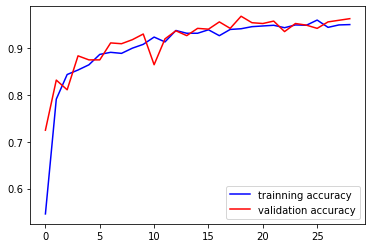

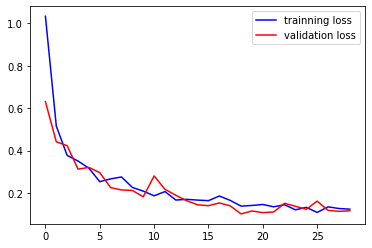

In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss") 
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [66]:
model.save('drowsiness_model.h5')
model.save_weights('drowsiness_mw.h5')

In [67]:
#model.save("drowiness_new6.h5")

In [73]:
prediction = np.argmax(model.predict(X_test), axis=-1)

In [74]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.11      0.97      0.19        63
     no_yawn       0.00      0.00      0.00        74
      Closed       0.00      0.00      0.00       215
        Open       0.55      0.03      0.05       226

    accuracy                           0.12       578
   macro avg       0.16      0.25      0.06       578
weighted avg       0.23      0.12      0.04       578



C:\Users\parun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\parun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\parun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="C:\\Users\\parun\\Downloads\\Dissertation\\xml docs\\haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("C:\\Users\\parun\\Downloads\\Dissertation\\h5_files\\drowiness_new6.h5")

In [86]:
prepare("C:\\Users\\parun\\Downloads\\Dissertation\\dataset\\droswsiness\\no_yawn\\1068.jpg")
prediction = model.predict([prepare("C:\\Users\\parun\\Downloads\\Dissertation\\dataset\\droswsiness\\no_yawn\\67.jpg")])
np.argmax(prediction)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [61]:
# prediction = model.predict([prepare("./dataset/train/Closed/_11.jpg")])
# np.argmax(prediction)

In [62]:
# prediction = model.predict([prepare("./dataset/train/Open/_104.jpg")])
# np.argmax(prediction)

In [63]:
# prediction = model.predict([prepare("./dataset/train/yawn/13.jpg")])
# np.argmax(prediction)